# DATA 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing research data
prep0 = pd.read_csv('reactor_data.csv')
prep0.head()

,Time,Running_cycle,FI-001,FI-002,TC-001,TC-002,DT-001,DT-002,DP-001,DP-002,...,TI-034,TI-035,TI-036,TI-037,TI-038,TI-039,TI-040,TI-041,TI-042,CONVERSION
0,6/29/2004 4:00,1,57.376325,669.985139,319.496265,270.298088,68.159380,42.059748,16.935505,0.967330,...,308.465166,293.210571,288.108362,312.395056,305.310342,303.123348,310.085243,309.464836,308.546075,93.200705
1,6/29/2004 4:00,2,57.415584,670.175315,319.506829,270.557335,68.149101,43.819212,16.906026,0.974280,...,310.060319,294.679554,289.054518,314.409080,307.335927,304.765668,311.408695,310.634102,309.389468,93.128145
2,6/29/2004 4:00,3,57.454843,670.365491,319.517393,270.816583,68.138821,45.578677,16.876548,0.981229,...,311.655473,296.148536,290.000675,316.423104,309.361511,306.407989,312.732147,311.803369,310.232862,93.055586
3,6/30/2004 0:00,4,57.543094,670.622632,319.553869,271.363961,68.380253,49.568133,16.811533,1.000760,...,315.280320,299.371886,292.082630,320.951668,313.762146,309.971053,315.635902,314.406282,312.107740,92.830864
4,6/30/2004 0:00,5,57.470024,670.828064,319.515243,270.964477,67.735901,45.934814,16.879419,0.977966,...,312.047943,296.581512,290.251892,316.915100,309.949554,306.832458,313.039825,312.000702,310.427032,93.200151


In [3]:
#Identity variables name
prep0.columns

Index(['Time', 'Running_cycle', 'FI-001', 'FI-002', 'TC-001', 'TC-002',
       'DT-001', 'DT-002', 'DP-001', 'DP-002', 'DP-003', 'DP-004', 'PI-001',
       'PI-002', 'PI-003', 'PI-004', 'AI-001', 'AI-002', 'AI-003', 'AI-004',
       'AI-005', 'AI-006', 'AI-007', 'AI-008', 'AI-009', 'AI-010', 'RX-001',
       'TI-001', 'TI-002', 'TI-005', 'TI-006', 'TI-007', 'TI-008', 'TI-009',
       'TI-010', 'TI-011', 'TI-012', 'TI-013', 'TI-014', 'TI-015', 'TI-018',
       'TI-019', 'TI-020', 'TI-021', 'TI-022', 'TI-023', 'TI-024', 'TI-025',
       'TI-026', 'TI-027', 'TI-028', 'TI-029', 'TI-030', 'TI-031', 'TI-032',
       'TI-033', 'TI-034', 'TI-035', 'TI-036', 'TI-037', 'TI-038', 'TI-039',
       'TI-040', 'TI-041', 'TI-042', 'CONVERSION'],
      dtype='object')

# DATA PREPARATION, CLEANING, AND FEATURE EXTRACTION

In [4]:
#Removing unused 'FI-002', 'NO', 'Time' column
prep1 = prep0.iloc[:, :].drop(['FI-001','Running_cycle','Time'], axis=1)
prep1

,FI-002,TC-001,TC-002,DT-001,DT-002,DP-001,DP-002,DP-003,DP-004,PI-001,...,TI-034,TI-035,TI-036,TI-037,TI-038,TI-039,TI-040,TI-041,TI-042,CONVERSION
0,669.985139,319.496265,270.298088,68.159380,42.059748,16.935505,0.967330,14.547414,32.450250,63.610362,...,308.465166,293.210571,288.108362,312.395056,305.310342,303.123348,310.085243,309.464836,308.546075,93.200705
1,670.175315,319.506829,270.557335,68.149101,43.819212,16.906026,0.974280,14.532135,32.412441,63.569363,...,310.060319,294.679554,289.054518,314.409080,307.335927,304.765668,311.408695,310.634102,309.389468,93.128145
2,670.365491,319.517393,270.816583,68.138821,45.578677,16.876548,0.981229,14.516856,32.374633,63.528364,...,311.655473,296.148536,290.000675,316.423104,309.361511,306.407989,312.732147,311.803369,310.232862,93.055586
3,670.622632,319.553869,271.363961,68.380253,49.568133,16.811533,1.000760,14.494793,32.307087,63.432052,...,315.280320,299.371886,292.082630,320.951668,313.762146,309.971053,315.635902,314.406282,312.107740,92.830864
4,670.828064,319.515243,270.964477,67.735901,45.934814,16.879419,0.977966,14.471894,32.329281,63.531145,...,312.047943,296.581512,290.251892,316.915100,309.949554,306.832458,313.039825,312.000702,310.427032,93.200151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18718,833.271973,323.390320,286.120880,67.911438,33.537292,20.344055,0.065580,20.184771,40.909565,70.437078,...,312.373871,301.223907,304.223450,299.636078,304.582642,300.072601,290.822022,289.512878,291.541504,94.829638
18719,832.827393,323.574768,286.037537,67.504608,33.254303,20.169985,0.066432,20.349388,40.900963,70.312330,...,312.328278,301.028229,304.057129,299.530151,304.531738,300.036346,290.642395,289.317627,291.300690,94.831773
18720,833.848450,323.598389,286.136810,67.682678,33.338257,20.028092,0.126205,20.386351,40.855808,70.336130,...,312.472900,301.012054,304.044495,299.594665,304.567383,300.047790,290.718109,289.436035,291.387756,94.878506
18721,833.529907,323.480347,286.043396,67.667175,32.947021,20.317225,0.075650,20.188131,40.896164,70.413744,...,312.350281,301.124390,304.156006,299.460388,304.473602,299.988190,290.674011,289.329468,291.345581,94.495033


In [5]:
#Convert timestamp object data to numerical
prep2 = prep1.apply(pd.to_numeric)
print(prep2.dtypes, prep2.shape)

FI-002        float64
TC-001        float64
TC-002        float64
DT-001        float64
DT-002        float64
               ...   
TI-039        float64
TI-040        float64
TI-041        float64
TI-042        float64
CONVERSION    float64
Length: 63, dtype: object (18723, 63)


In [6]:
#Check if there's missing value
prep2.isnull().sum()

FI-002        0
TC-001        0
TC-002        0
DT-001        0
DT-002        0
             ..
TI-039        0
TI-040        0
TI-041        0
TI-042        0
CONVERSION    0
Length: 63, dtype: int64

<AxesSubplot:xlabel='FI-002'>

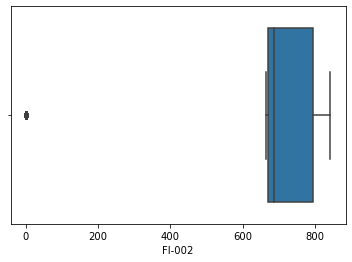

In [7]:
#Removing data where plant is not run, by identifying total raw material 'FI-001' loss flow rate
sns.boxplot(data=prep2,x=prep2['FI-002'])

In [8]:
#Remove shut down data by identifying outlier FI-001 with Inter Quantile Range Method

from numpy import percentile
# calculate interquartile range
q25_a, q75_a = percentile(prep2['FI-002'], 25), percentile(prep2['FI-002'], 75)
iqr_a = q75_a - q25_a
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25_a, q75_a, iqr_a))
# calculate the outlier cutoff
cut_off_a = iqr_a * 1.5
lower_a, upper_a = q25_a - cut_off_a, q75_a + cut_off_a
print('Lower whisker=%.2f, Upper whisker=%.2f' % (lower_a, upper_a))
# identify outliers
shut_down_data = prep2[(prep2['FI-002']<lower_a)|(prep2['FI-002']>upper_a)]
print('Shut down data: %d' % len(shut_down_data))
# remove outliers
shut_down_removed = prep2[(prep2['FI-002']>lower_a)&(prep2['FI-002']<upper_a)]
print('Non-Shut down data: %d' % len(shut_down_removed))

Percentiles: 25th=670.419, 75th=794.510, IQR=124.090
Lower whisker=484.28, Upper whisker=980.65
Shut down data: 2510
Non-Shut down data: 16213


<AxesSubplot:xlabel='FI-002'>

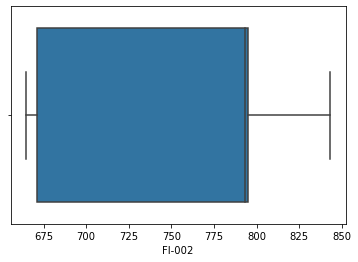

In [9]:
#Check again if there's still outlier in 'FI-001'
sns.boxplot(data=shut_down_removed, x=shut_down_removed['FI-002'])

In [10]:
prep3 = shut_down_removed
prep3.shape

(16213, 63)

In [11]:
#Remove outlier for all variables while keeps the whole row intact
lb = prep3.quantile(0.01)
ub = prep3.quantile(0.99)

prep4 = prep3[(prep3 > lb) & (prep3 < ub)]
prep4

,FI-002,TC-001,TC-002,DT-001,DT-002,DP-001,DP-002,DP-003,DP-004,PI-001,...,TI-034,TI-035,TI-036,TI-037,TI-038,TI-039,TI-040,TI-041,TI-042,CONVERSION
0,669.985139,319.496265,270.298088,68.159380,42.059748,16.935505,0.967330,14.547414,32.450250,63.610362,...,308.465166,293.210571,288.108362,312.395056,305.310342,303.123348,310.085243,309.464836,308.546075,93.200705
1,670.175315,319.506829,270.557335,68.149101,43.819212,16.906026,0.974280,14.532135,32.412441,63.569363,...,310.060319,294.679554,289.054518,314.409080,307.335927,304.765668,311.408695,310.634102,309.389468,93.128145
2,670.365491,319.517393,270.816583,68.138821,45.578677,16.876548,0.981229,14.516856,32.374633,63.528364,...,311.655473,296.148536,290.000675,316.423104,309.361511,306.407989,312.732147,311.803369,310.232862,93.055586
3,670.622632,319.553869,271.363961,68.380253,49.568133,16.811533,1.000760,14.494793,32.307087,63.432052,...,315.280320,299.371886,292.082630,320.951668,313.762146,309.971053,315.635902,314.406282,312.107740,92.830864
4,670.828064,319.515243,270.964477,67.735901,45.934814,16.879419,0.977966,14.471894,32.329281,63.531145,...,312.047943,296.581512,290.251892,316.915100,309.949554,306.832458,313.039825,312.000702,310.427032,93.200151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18718,833.271973,323.390320,286.120880,67.911438,33.537292,20.344055,0.065580,20.184771,40.909565,70.437078,...,312.373871,301.223907,304.223450,299.636078,304.582642,300.072601,290.822022,289.512878,291.541504,94.829638
18719,832.827393,323.574768,286.037537,67.504608,33.254303,20.169985,0.066432,20.349388,40.900963,70.312330,...,312.328278,301.028229,304.057129,299.530151,304.531738,300.036346,290.642395,289.317627,291.300690,94.831773
18720,833.848450,323.598389,286.136810,67.682678,33.338257,20.028092,0.126205,20.386351,40.855808,70.336130,...,312.472900,301.012054,304.044495,299.594665,304.567383,300.047790,290.718109,289.436035,291.387756,94.878506
18721,833.529907,323.480347,286.043396,67.667175,32.947021,20.317225,0.075650,20.188131,40.896164,70.413744,...,312.350281,301.124390,304.156006,299.460388,304.473602,299.988190,290.674011,289.329468,291.345581,94.495033


In [12]:
prep4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16213 entries, 0 to 18722
Data columns (total 63 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FI-002      15887 non-null  float64
 1   TC-001      15886 non-null  float64
 2   TC-002      15887 non-null  float64
 3   DT-001      15886 non-null  float64
 4   DT-002      15888 non-null  float64
 5   DP-001      15886 non-null  float64
 6   DP-002      15816 non-null  float64
 7   DP-003      15885 non-null  float64
 8   DP-004      15886 non-null  float64
 9   PI-001      15886 non-null  float64
 10  PI-002      15886 non-null  float64
 11  PI-003      15887 non-null  float64
 12  PI-004      15887 non-null  float64
 13  AI-001      15887 non-null  float64
 14  AI-002      15887 non-null  float64
 15  AI-003      15887 non-null  float64
 16  AI-004      15887 non-null  float64
 17  AI-005      15851 non-null  float64
 18  AI-006      15887 non-null  float64
 19  AI-007      15887 non-nul

<AxesSubplot:>

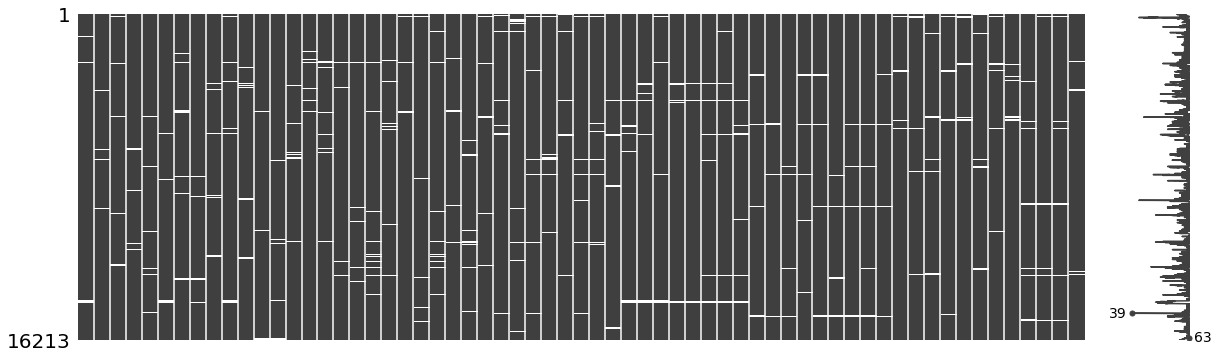

In [13]:
#Check deleted value position
import missingno as mno
mno.matrix(prep4, figsize = (20, 6))

In [14]:
#Fill missing value (from removed outlier) with imputer
prep5 = prep4.interpolate(method ='linear', limit_direction ='forward')
prep5.head()

,FI-002,TC-001,TC-002,DT-001,DT-002,DP-001,DP-002,DP-003,DP-004,PI-001,...,TI-034,TI-035,TI-036,TI-037,TI-038,TI-039,TI-040,TI-041,TI-042,CONVERSION
0,669.985139,319.496265,270.298088,68.159380,42.059748,16.935505,0.967330,14.547414,32.450250,63.610362,...,308.465166,293.210571,288.108362,312.395056,305.310342,303.123348,310.085243,309.464836,308.546075,93.200705
1,670.175315,319.506829,270.557335,68.149101,43.819212,16.906026,0.974280,14.532135,32.412441,63.569363,...,310.060319,294.679554,289.054518,314.409080,307.335927,304.765668,311.408695,310.634102,309.389468,93.128145
2,670.365491,319.517393,270.816583,68.138821,45.578677,16.876548,0.981229,14.516856,32.374633,63.528364,...,311.655473,296.148536,290.000675,316.423104,309.361511,306.407989,312.732147,311.803369,310.232862,93.055586
3,670.622632,319.553869,271.363961,68.380253,49.568133,16.811533,1.000760,14.494793,32.307087,63.432052,...,315.280320,299.371886,292.082630,320.951668,313.762146,309.971053,315.635902,314.406282,312.107740,92.830864
4,670.828064,319.515243,270.964477,67.735901,45.934814,16.879419,0.977966,14.471894,32.329281,63.531145,...,312.047943,296.581512,290.251892,316.915100,309.949554,306.832458,313.039825,312.000702,310.427032,93.200151


In [15]:
prep5.isnull().sum()

FI-002        0
TC-001        0
TC-002        0
DT-001        0
DT-002        0
             ..
TI-039        0
TI-040        0
TI-041        0
TI-042        0
CONVERSION    0
Length: 63, dtype: int64

In [16]:
prep5.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FI-002,16213.0,746.679192,68.974394,668.778687,671.182739,793.192139,794.781494,836.910889
TC-001,16213.0,322.950928,5.226784,312.015381,319.500427,322.585754,326.562042,334.638306
TC-002,16213.0,278.760113,6.484141,266.984192,273.608520,278.874756,284.130310,292.542786
DT-001,16213.0,66.416289,6.934921,51.402039,62.645111,67.749573,71.104828,80.546149
DT-002,16213.0,37.237985,11.090657,22.402069,28.286957,34.591809,43.110779,69.457214
...,...,...,...,...,...,...,...,...
TI-039,16213.0,304.102563,7.659816,288.000122,298.397888,304.587952,309.892517,320.615326
TI-040,16213.0,305.790454,14.960208,278.586883,291.905914,307.346619,316.723419,336.157837
TI-041,16213.0,307.477383,14.811054,281.091980,294.418945,307.079346,319.622864,336.463501
TI-042,16213.0,304.674310,16.186075,277.008789,290.616974,303.848419,318.172211,335.618439


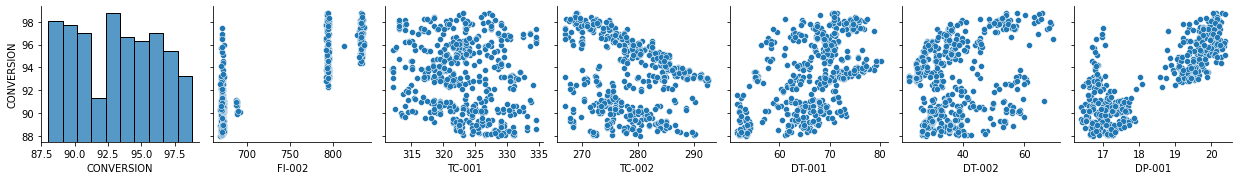

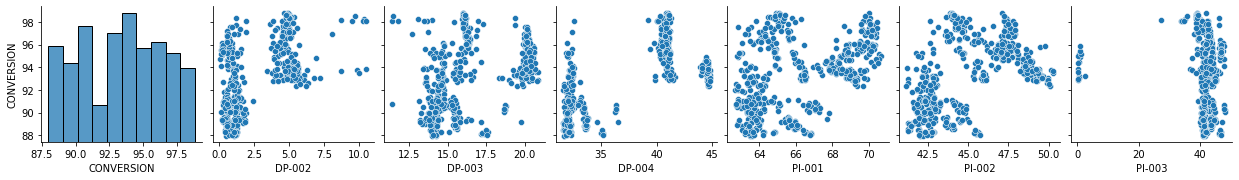

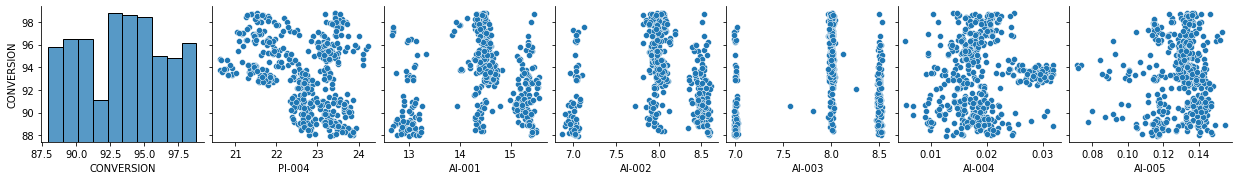

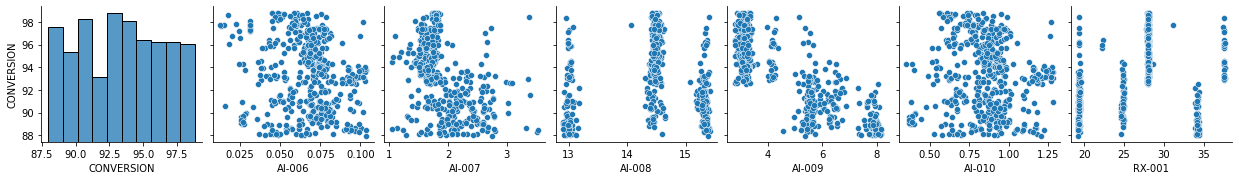

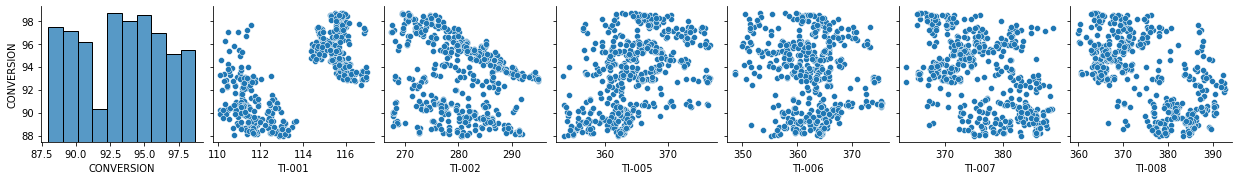

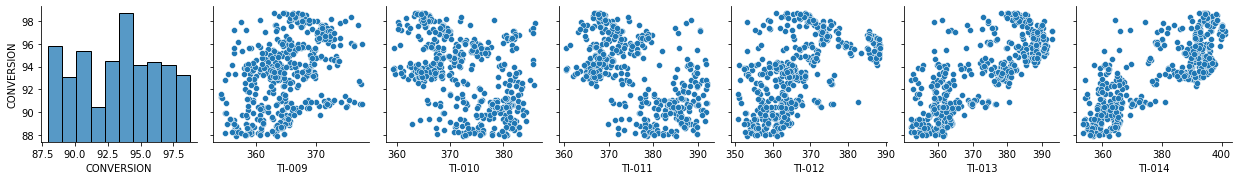

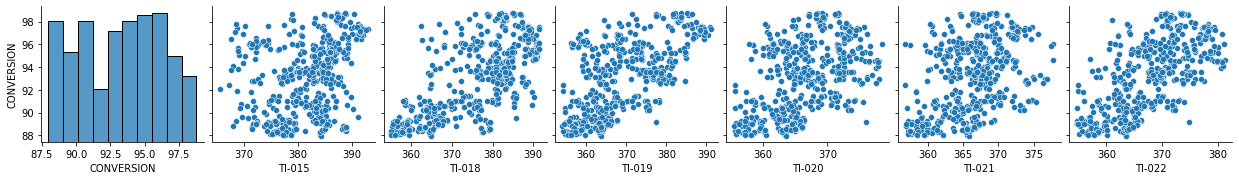

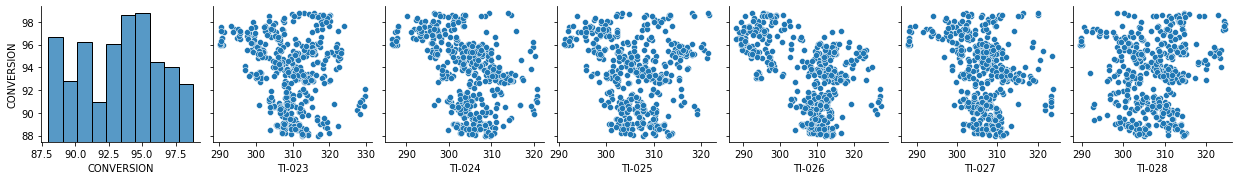

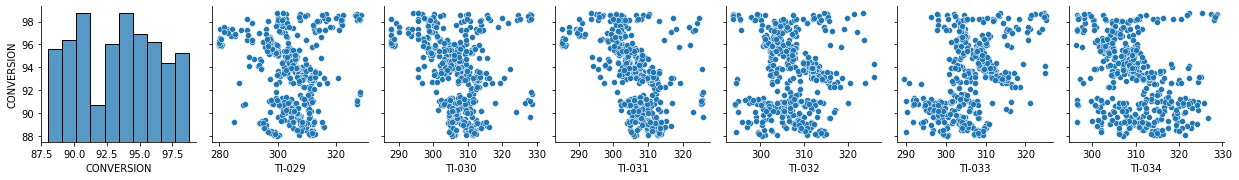

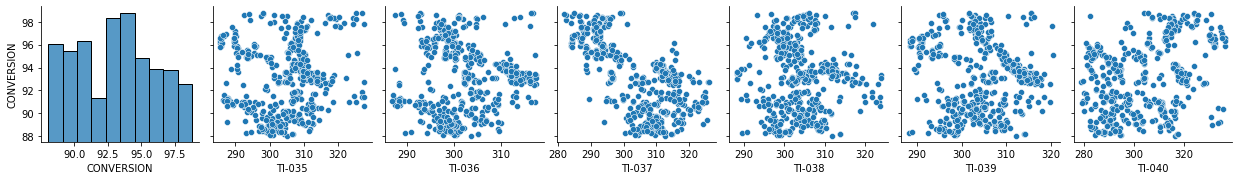

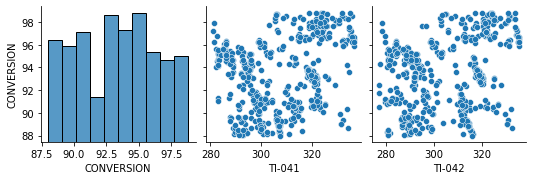

In [17]:
#Pairplot each predictor to target
sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION','FI-002', 'TC-001', 'TC-002','DT-001', 'DT-002','DP-001'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION','DP-002', 'DP-003', 'DP-004', 'PI-001','PI-002', 'PI-003'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION', 'PI-004', 'AI-001', 'AI-002','AI-003', 'AI-004','AI-005'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION', 'AI-006', 'AI-007','AI-008', 'AI-009', 'AI-010', 'RX-001'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION', 'TI-001','TI-002','TI-005', 'TI-006', 'TI-007', 'TI-008'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION','TI-009','TI-010', 'TI-011', 'TI-012', 'TI-013','TI-014'],
    y_vars = ['CONVERSION'])
    
sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION', 'TI-015', 'TI-018','TI-019', 'TI-020', 'TI-021', 'TI-022'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION','TI-023', 'TI-024', 'TI-025', 'TI-026', 'TI-027', 'TI-028'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION', 'TI-029', 'TI-030', 'TI-031', 'TI-032','TI-033', 'TI-034'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION','TI-035', 'TI-036', 'TI-037', 'TI-038', 'TI-039','TI-040'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION','TI-041', 'TI-042'],
    y_vars = ['CONVERSION'])

In [18]:
#Correlation matrix after data imputation
corr2 = prep5.corr()
corr2.style.background_gradient(cmap='coolwarm')

In [19]:
#Data Scaling with normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
scaled_data = pd.DataFrame(scaler.fit_transform(prep5), columns = prep5.columns)
print(scaled_data)

         FI-002    TC-001    TC-002    DT-001    DT-002    DP-001    DP-002  \
0      0.007176  0.330677  0.129659  0.574982  0.417758  0.137982  0.091838   
1      0.008307  0.331144  0.139802  0.574629  0.455150  0.130618  0.092498   
2      0.009438  0.331611  0.149945  0.574277  0.492541  0.123254  0.093158   
3      0.010967  0.333223  0.171362  0.582561  0.577324  0.107012  0.095012   
4      0.012189  0.331516  0.155732  0.560452  0.500110  0.123971  0.092848   
...         ...       ...       ...       ...       ...       ...       ...   
16208  0.978357  0.502806  0.748738  0.566475  0.236642  0.989480  0.006215   
16209  0.975713  0.510959  0.745477  0.552515  0.230628  0.945995  0.006296   
16210  0.981786  0.512003  0.749361  0.558625  0.232412  0.910548  0.011972   
16211  0.979891  0.506785  0.745706  0.558093  0.224098  0.982777  0.007171   
16212  0.979891  0.506785  0.745706  0.558093  0.224098  0.982777  0.007171   

         DP-003    DP-004    PI-001  ...    TI-034 

In [20]:
# Pearson correlation coefficient
select_corr = scaled_data.corr()["CONVERSION"].sort_values(ascending=False)[1:]

# absolute for positive values
abs_corr = abs(select_corr)

# random threshold for features to keep
selected_features = abs_corr[abs_corr>0.4]
selected_features

DP-001    0.807746
FI-002    0.806157
TI-014    0.795037
TI-013    0.764606
TI-018    0.700174
DP-004    0.675512
TI-001    0.667385
TI-019    0.647600
TI-022    0.644449
DT-001    0.544135
TI-012    0.542178
DP-002    0.530594
PI-002    0.473997
TI-005    0.472168
TI-020    0.465437
PI-001    0.430794
TI-024    0.408135
AI-007    0.462468
TI-010    0.487901
TI-007    0.495802
TI-031    0.504460
TI-026    0.542696
TI-011    0.582506
TI-008    0.608041
TI-037    0.676970
AI-009    0.797870
Name: CONVERSION, dtype: float64

In [21]:
len(selected_features)

26

In [22]:
# Drop low correlation features
prep6 = scaled_data[selected_features.index].interpolate(method ='linear', limit_direction ='backward')
prep6.isnull().sum()

DP-001    0
FI-002    0
TI-014    0
TI-013    0
TI-018    0
DP-004    0
TI-001    0
TI-019    0
TI-022    0
DT-001    0
TI-012    0
DP-002    0
PI-002    0
TI-005    0
TI-020    0
PI-001    0
TI-024    0
AI-007    0
TI-010    0
TI-007    0
TI-031    0
TI-026    0
TI-011    0
TI-008    0
TI-037    0
AI-009    0
dtype: int64

In [23]:
y_lasso = scaled_data["CONVERSION"]
X_lasso = prep6

In [24]:
#Eliminate multicollinearity by removing irrelavant features with ebbedded method
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X_lasso, y_lasso)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_lasso,y_lasso))
coef = pd.Series(reg.coef_, index = X_lasso.columns)

Best alpha using built-in LassoCV: 0.000093
Best score using built-in LassoCV: 0.933171


In [25]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 23 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

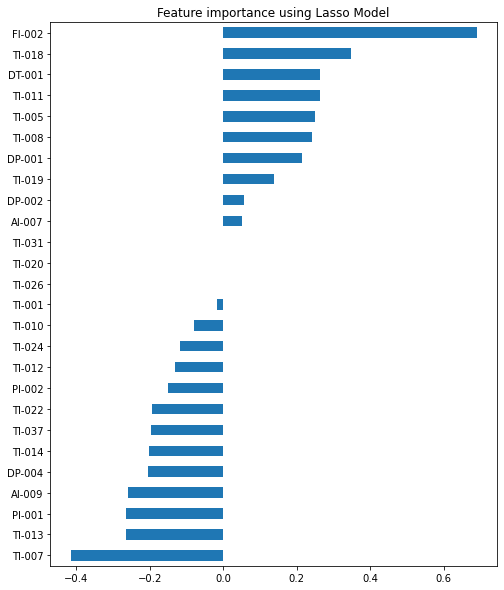

In [26]:
#Visualize important feature
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [27]:
#Select relevant reatures
abs_coef = abs(coef)
relevant_features = abs_coef[abs_coef>0]
prep7 = prep6[relevant_features.index].sort_index(axis=1, ascending=True)
prep7['CONVERSION'] = scaled_data["CONVERSION"]
prep7.shape

(16213, 24)

In [28]:
#Showing correlation between relevant features
corr3 = prep7.corr().style.background_gradient(cmap='coolwarm')
corr3

,AI-007,AI-009,DP-001,DP-002,DP-004,DT-001,FI-002,PI-001,PI-002,TI-001,TI-005,TI-007,TI-008,TI-010,TI-011,TI-012,TI-013,TI-014,TI-018,TI-019,TI-022,TI-024,TI-037,CONVERSION
AI-007,1.000000,0.508171,-0.605068,-0.365598,-0.598543,-0.329122,-0.633123,-0.380027,-0.473995,-0.630089,-0.390715,0.496358,0.633507,0.485211,0.611309,-0.421666,-0.604346,-0.610053,-0.352382,-0.425173,-0.502453,0.286689,0.343341,-0.462468
AI-009,0.508171,1.000000,-0.899661,-0.620813,-0.894308,-0.743551,-0.895437,-0.711594,-0.792831,-0.752550,-0.576772,0.441013,0.658815,0.488060,0.633110,-0.616926,-0.874695,-0.924246,-0.692661,-0.730534,-0.771141,0.188240,0.437556,-0.797870
DP-001,-0.605068,-0.899661,1.000000,0.620755,0.889258,0.539755,0.965602,0.706694,0.738625,0.881947,0.492134,-0.567006,-0.808451,-0.608148,-0.773423,0.621358,0.891708,0.913155,0.601093,0.716365,0.745159,-0.354156,-0.621459,0.807746
DP-002,-0.365598,-0.620813,0.620755,1.000000,0.722134,0.456555,0.640760,0.588011,0.645439,0.725394,0.308169,-0.622378,-0.619462,-0.727030,-0.678629,0.003394,0.527995,0.707311,0.388921,0.694828,0.599367,-0.100517,-0.166654,0.530594
DP-004,-0.598543,-0.894308,0.889258,0.722134,1.000000,0.607239,0.909023,0.723330,0.883843,0.913648,0.429869,-0.648597,-0.812200,-0.677713,-0.811741,0.460695,0.808411,0.907286,0.585408,0.640425,0.660184,-0.140233,-0.374423,0.675512
DT-001,-0.329122,-0.743551,0.539755,0.456555,0.607239,1.000000,0.530917,0.536242,0.590392,0.355050,0.414796,-0.220331,-0.330181,-0.271744,-0.304564,0.334746,0.570736,0.655155,0.457136,0.534459,0.512240,0.131472,-0.095858,0.544135
FI-002,-0.633123,-0.895437,0.965602,0.640760,0.909023,0.530917,1.000000,0.757240,0.810297,0.901855,0.474443,-0.613811,-0.828346,-0.644734,-0.809575,0.611593,0.894242,0.928547,0.648715,0.696366,0.735951,-0.336182,-0.585382,0.806157
PI-001,-0.380027,-0.711594,0.706694,0.588011,0.723330,0.536242,0.757240,1.000000,0.900401,0.608901,0.371899,-0.400631,-0.563919,-0.509155,-0.587717,0.382584,0.675045,0.723003,0.503509,0.677317,0.632747,-0.043757,-0.161847,0.430794
PI-002,-0.473995,-0.792831,0.738625,0.645439,0.883843,0.590392,0.810297,0.900401,1.000000,0.741510,0.375364,-0.515149,-0.664529,-0.577960,-0.686526,0.399252,0.704911,0.794443,0.552277,0.600037,0.604474,0.015895,-0.156943,0.473997
TI-001,-0.630089,-0.752550,0.881947,0.725394,0.913648,0.355050,0.901855,0.608901,0.741510,1.000000,0.329103,-0.746413,-0.887895,-0.769282,-0.890285,0.376772,0.746975,0.837916,0.458846,0.591936,0.610212,-0.310427,-0.511568,0.667385


In [29]:
#Drop high correlation variables among predictor
prep8 = prep7.drop(['FI-002', 'TI-001','TI-007', 'TI-010', 'TI-011', 'TI-014', 'PI-001'], axis = 1)

In [30]:
#Showing correlation between relevant features
corr4 = prep8.corr().style.background_gradient(cmap='coolwarm')
corr4

,AI-007,AI-009,DP-001,DP-002,DP-004,DT-001,PI-002,TI-005,TI-008,TI-012,TI-013,TI-018,TI-019,TI-022,TI-024,TI-037,CONVERSION
AI-007,1.000000,0.508171,-0.605068,-0.365598,-0.598543,-0.329122,-0.473995,-0.390715,0.633507,-0.421666,-0.604346,-0.352382,-0.425173,-0.502453,0.286689,0.343341,-0.462468
AI-009,0.508171,1.000000,-0.899661,-0.620813,-0.894308,-0.743551,-0.792831,-0.576772,0.658815,-0.616926,-0.874695,-0.692661,-0.730534,-0.771141,0.188240,0.437556,-0.797870
DP-001,-0.605068,-0.899661,1.000000,0.620755,0.889258,0.539755,0.738625,0.492134,-0.808451,0.621358,0.891708,0.601093,0.716365,0.745159,-0.354156,-0.621459,0.807746
DP-002,-0.365598,-0.620813,0.620755,1.000000,0.722134,0.456555,0.645439,0.308169,-0.619462,0.003394,0.527995,0.388921,0.694828,0.599367,-0.100517,-0.166654,0.530594
DP-004,-0.598543,-0.894308,0.889258,0.722134,1.000000,0.607239,0.883843,0.429869,-0.812200,0.460695,0.808411,0.585408,0.640425,0.660184,-0.140233,-0.374423,0.675512
DT-001,-0.329122,-0.743551,0.539755,0.456555,0.607239,1.000000,0.590392,0.414796,-0.330181,0.334746,0.570736,0.457136,0.534459,0.512240,0.131472,-0.095858,0.544135
PI-002,-0.473995,-0.792831,0.738625,0.645439,0.883843,0.590392,1.000000,0.375364,-0.664529,0.399252,0.704911,0.552277,0.600037,0.604474,0.015895,-0.156943,0.473997
TI-005,-0.390715,-0.576772,0.492134,0.308169,0.429869,0.414796,0.375364,1.000000,-0.223338,0.663101,0.721532,0.567874,0.692503,0.869386,-0.326888,-0.236536,0.471386
TI-008,0.633507,0.658815,-0.808451,-0.619462,-0.812200,-0.330181,-0.664529,-0.223338,1.000000,-0.324047,-0.680916,-0.363761,-0.555022,-0.518661,0.317664,0.509761,-0.608041
TI-012,-0.421666,-0.616926,0.621358,0.003394,0.460695,0.334746,0.399252,0.663101,-0.324047,1.000000,0.807006,0.691695,0.480650,0.593642,-0.248633,-0.468822,0.542178


In [31]:
# Pearson correlation coefficient
corr_final_feat = prep8.corr()["CONVERSION"].sort_values(ascending=False)[1:]

# absolute for positive values
abs_corr_final = abs(corr_final_feat)

print(abs_corr_final)

DP-001    0.807746
TI-013    0.764606
TI-018    0.700174
DP-004    0.675512
TI-019    0.647600
TI-022    0.644449
DT-001    0.544135
TI-012    0.542178
DP-002    0.530594
PI-002    0.473997
TI-005    0.471386
TI-024    0.408135
AI-007    0.462468
TI-008    0.608041
TI-037    0.676970
AI-009    0.797870
Name: CONVERSION, dtype: float64


In [32]:
prep8.describe()

,AI-007,AI-009,DP-001,DP-002,DP-004,DT-001,PI-002,TI-005,TI-008,TI-012,TI-013,TI-018,TI-019,TI-022,TI-024,TI-037,CONVERSION
count,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000
mean,0.344613,0.346348,0.530719,0.244814,0.464081,0.515173,0.440587,0.472970,0.448470,0.406076,0.503894,0.607074,0.444170,0.495458,0.521960,0.482083,0.491219
std,0.161072,0.311541,0.344385,0.215015,0.365870,0.237953,0.284654,0.220095,0.268006,0.240323,0.292610,0.270313,0.253621,0.233386,0.191360,0.242921,0.281156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240180,0.074240,0.159918,0.058720,0.055099,0.385775,0.176755,0.334918,0.201664,0.241212,0.227581,0.377764,0.250587,0.324455,0.409749,0.262745,0.235998
50%,0.290550,0.244595,0.692077,0.117396,0.676352,0.560921,0.385582,0.459779,0.359732,0.354211,0.550594,0.692458,0.409205,0.509707,0.533446,0.510281,0.510707
75%,0.415732,0.544039,0.853240,0.452093,0.713119,0.676047,0.700792,0.616159,0.681762,0.533615,0.760995,0.810577,0.640118,0.651880,0.655715,0.680016,0.717906
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
prep8.columns

Index(['AI-007', 'AI-009', 'DP-001', 'DP-002', 'DP-004', 'DT-001', 'PI-002',
       'TI-005', 'TI-008', 'TI-012', 'TI-013', 'TI-018', 'TI-019', 'TI-022',
       'TI-024', 'TI-037', 'CONVERSION'],
      dtype='object')

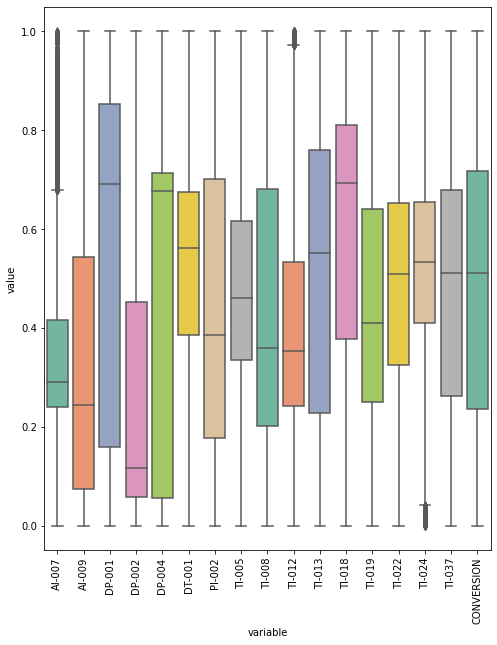

In [34]:
all_boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(pd.DataFrame(data=scaled_data, 
        columns=['AI-007', 'AI-009', 'DP-001', 'DP-002', 'DP-004', 'DT-001',
       'PI-002', 'TI-005', 'TI-008', 'TI-012', 'TI-013', 'TI-018', 'TI-019',
       'TI-022', 'TI-024', 'TI-037', 'CONVERSION'])), linewidth=1.5, palette="Set2")
plt.setp(all_boxplot.get_xticklabels(), rotation=90)
plt.show()

In [35]:
len(prep8.columns)

17

In [36]:
#Select data for predictors and target

#Import the features
X_df = prep8.drop('CONVERSION', axis = 1)
X = prep8.drop('CONVERSION', axis = 1).values.astype(float).reshape(-1, len(prep8.columns)-1)

# Extract the target
y_df = prep8['CONVERSION']
y = prep8['CONVERSION'].values.astype(float)

print(X.shape, y.shape)

(16213, 16) (16213,)


In [37]:
#Create function to return conversion scale for later use
def return_conversion_scale(variable_plot):
    minimum = min(prep5['CONVERSION'])
    maximum = max(prep5['CONVERSION'])
    return ((variable_plot - min(variable_plot)) /(max(variable_plot) - min(variable_plot)))*(maximum-minimum)+minimum

Observations: 16213
Training Observations: 13781
Testing Observations: 2432


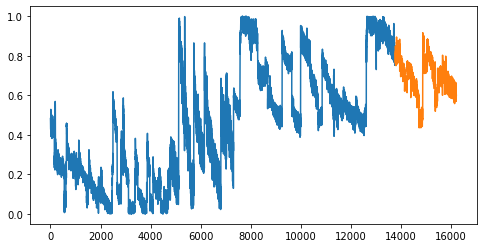

In [38]:
#Divide data into training 70%, validation 15% and testing 15%
#In this first step, we will divide data which will be used to train the model and as prediction
#1st splitting : training (85%); testing (15%)
y_tr_size = int(len(y) * 0.85)
y_tr, y_test = y[0:y_tr_size], y[y_tr_size:len(y)]
X_tr_size = int(len(X) * 0.85)
X_tr, X_test = X[0:X_tr_size], X[X_tr_size:len(X)]
print('Observations: %d' % (len(y)))
print('Training Observations: %d' % (len(y_tr)))
print('Testing Observations: %d' % (len(y_test)))
plt.subplots(figsize=(8,4))
plt.plot(y_tr)
plt.plot([None for i in y_tr] + [X for X in y_test])
plt.show()

In [39]:
print('Training Features Shape:', X_tr.shape)
print('Training Targets Shape:', X_test.shape)
print('Testing Features Shape:', y_tr.shape)
print('Testing Targets Shape:', y_test.shape)

Training Features Shape: (13781, 16)
Training Targets Shape: (2432, 16)
Testing Features Shape: (13781,)
Testing Targets Shape: (2432,)


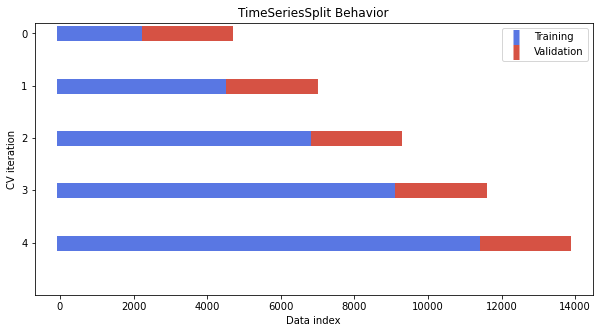

In [40]:
#Import and initialize the cross-validation iterator
#In the second step, we split training data from 1st step into training (80%); validation (20%)
from sklearn.model_selection import TimeSeriesSplit

n_splits = 5
ts_split = TimeSeriesSplit(n_splits)

fig, ax = plt.subplots(figsize=(10,5))
for ii, (tr, tt) in enumerate(ts_split.split(X_tr, y_tr)):
    
    #Plot training and testing indices
    l1 = ax.scatter(tr, [ii] * len(tr), c=[plt.cm.coolwarm(.1)],
                    marker='_', lw=15)
    l2 = ax.scatter(tt, [ii] * len(tt), c=[plt.cm.coolwarm(.9)],
                    marker='_', lw=15)
    ax.set(ylim=[n_splits, -.2], yticks=np.arange(n_splits), title='TimeSeriesSplit Behavior', xlabel='Data index', ylabel='CV iteration')
    ax.legend([l1, l2], ['Training', 'Validation'])

In [41]:
for train_index, test_index in ts_split.split(X_tr, y_tr):
     print("TRAIN:", train_index, "TEST:", test_index)

     #To get the indices 
     X_train, X_val = X_tr[train_index], X_tr[test_index]
     y_train, y_val = y_tr[train_index], y_tr[test_index]

TRAIN: [   0    1    2 ... 2298 2299 2300] TEST: [2301 2302 2303 ... 4594 4595 4596]
TRAIN: [   0    1    2 ... 4594 4595 4596] TEST: [4597 4598 4599 ... 6890 6891 6892]
TRAIN: [   0    1    2 ... 6890 6891 6892] TEST: [6893 6894 6895 ... 9186 9187 9188]
TRAIN: [   0    1    2 ... 9186 9187 9188] TEST: [ 9189  9190  9191 ... 11482 11483 11484]
TRAIN: [    0     1     2 ... 11482 11483 11484] TEST: [11485 11486 11487 ... 13778 13779 13780]


In [42]:
print('Training Features Shape:', X_train.shape)
print('Training Targets Shape:', y_train.shape)
print('Validation Features Shape:', X_val.shape)
print('Validation Targets Shape:', y_val.shape)

Training Features Shape: (11485, 16)
Training Targets Shape: (11485,)
Validation Features Shape: (2296, 16)
Validation Targets Shape: (2296,)


In [43]:
#Measurement metrics for inverted scale
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from math import log
    
def model_metrics(actual, predict):
    ac = return_conversion_scale(actual)
    pr = return_conversion_scale(predict)
    print('Mean Absolute Error:', metrics.mean_absolute_error(ac, pr))
    print('Mean Squared Error:', metrics.mean_squared_error(ac, pr))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ac, pr)))
    print('Coefficient of Determination:', r2_score(actual, predict)) 
    
    # calculate aic for regression
    lr_model = LinearRegression()
    lr_model.fit(pr.reshape(-1, 1), ac.reshape(-1, 1))
    # number of parameters
    num_params = len(lr_model.coef_) + 1
    # predict the training set
    yhat = lr_model.predict(pr.reshape(-1, 1))
    # calculate the error
    mse = metrics.mean_squared_error(ac, yhat)
    # calculate the aic
    aic = len(ac) * log(mse) + 2 * num_params
    print('Akaike Information Criterion: %.3f' % aic)
    
    # calculate bic for regression
    bic = len(ac) * log(mse) + num_params * log(len(ac))
    print('Bayesian Information Criterion: %.3f' % bic)

# RNN - LSTM

In [44]:
#Import RNN-LSTM library
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasRegressor
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import GridSearchCV

In [45]:
#Reshape data into 3D input
X_train_adj = X_train.reshape((X_train.shape[0], 1, X_train.shape[1])) #reshape (adjust) train shape to 3 dimensional
X_val_adj  = X_val.reshape((X_val.shape[0], 1, X_val.shape[1])) #reshape (adjust) test shape to 3 dimensional
print(X_train_adj.shape, X_val_adj.shape, y_train.shape, y_val.shape )

(11485, 1, 16) (2296, 1, 16) (11485,) (2296,)


In [ ]:
#Build the model
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(75, return_sequences = True, input_shape = (X_train_adj.shape[1], X_train_adj.shape[2])))
model_lstm.add(tf.keras.layers.LSTM(units=30))
model_lstm.add(tf.keras.layers.Dropout(0.2))
model_lstm.add(tf.keras.layers.Dense(units=1))
model_lstm.compile(loss = 'mse', optimizer = 'adam')
model_lstm.summary()

In [ ]:
#Fit the model
history_lstm = model_lstm.fit(X_train_adj, y_train, epochs = 20, batch_size=64, validation_data = (X_val_adj, y_val), shuffle=False)

In [ ]:
# plot history
plt.plot(history_lstm.history['loss'], label='train')
plt.plot(history_lstm.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
lstm_first_pred = model_lstm(X_val_adj)

In [ ]:
#Convert Tensor value to array
lstm_first_pred_a = lstm_first_pred.numpy()

In [ ]:
model_metrics(y_val, lstm_first_pred_a)

In [ ]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,3))
    plt.plot(return_conversion_scale(y_val), label = "Actual Conversion")
    plt.plot(return_conversion_scale(lstm_first_pred), label = "Prediction")
    plt.title('LSTM Base Model')
    plt.xlabel('Time (h)')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

In [ ]:
#Plot relationship between observed and predicted value
m_lstm_base, b_lstm_base = np.polyfit(return_conversion_scale(y_val), return_conversion_scale(lstm_first_pred), 1)

with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,6))
    plt.plot(return_conversion_scale(y_val), return_conversion_scale(lstm_first_pred), 'o', 
             markeredgecolor='k', markersize=3, markerfacecolor='w')
    plt.plot(return_conversion_scale(y_val), m_lstm_base*(return_conversion_scale(y_val)) + b_lstm_base, color = 'r')
    plt.xlabel('Observation')
    plt.ylabel('Prediction')
    plt.show()

In [50]:
#LSTM hyperparameter tuning 1st step : batch_size and epochs
#Create LSTM function model
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(75, return_sequences = True, input_shape = (X_train_adj.shape[1], X_train_adj.shape[2])))
    model.add(tf.keras.layers.LSTM(units=30))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(units=1))
    
    model.compile(loss = 'mse', optimizer = 'adam', metrics=[tf.keras.metrics.MeanSquaredError()])
    model.summary()
    return model

In [51]:
model_tuning = KerasRegressor(build_fn=create_model, verbose=0)

In [ ]:
# define the grid search parameters
batch_size = [8, 16, 32, 64, 128, 256, 512]
epochs = [10, 15, 20, 50] #trial without 100

param_grid = dict(batch_size=batch_size, epochs=epochs)
lstm_grid = GridSearchCV(estimator=model_tuning, param_grid=param_grid, n_jobs=-1, cv=ts_split)
grid_result = lstm_grid.fit(X_train_adj, y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
#pd.DataFrame(grid_result.cv_results_).head()

In [ ]:
lstm_grid.best_params_

In [61]:
#LSTM hyperparameter tuning 2nd step : dropout rate
# fit a model and plot learning curve
def trial_dropout(dropout):
    # define model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(75, return_sequences = True, input_shape = (X_train_adj.shape[1], X_train_adj.shape[2])))
    model.add(tf.keras.layers.LSTM(units=30))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(units=1))
    
    # compile model
    opt = tf.keras.optimizers.Adam(lr=0.01)
    model.compile(loss = 'mse', optimizer = opt, metrics=[tf.keras.metrics.MeanSquaredError()])
    
    model.summary() 
    
    # fit model
    model_history = model.fit(X_train_adj, y_train, epochs =10, 
                                  batch_size=8, validation_data = (X_val_adj, y_val), 
                                  verbose=2)
    return(model)

In [62]:
# run a repeated experiment
def experiment_dropout(n_repeats, dropout):
    # run experiment
    error_scores = list()
    for r in range(n_repeats):
        # fit the model
        # forecast test dataset
        output = trial_dropout(dropout).predict(X_val_adj)
        # report performance
        mse = metrics.mean_squared_error(y_val, output)
        print('%d) Test MSE: %.3f' % (r+1, mse))
        error_scores.append(mse)
    return error_scores

In [63]:
def run_dropout():
    # load dataset
    dropouts = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
    n_repeats = 20
    # run the experiment
    results_dropout = pd.DataFrame()
    for dropout in dropouts:
        results_dropout[str(dropout)] = experiment_dropout(n_repeats, dropout)
    # summarize results
    print(results_dropout.describe())
    # save boxplot
    results_dropout.to_excel('lstm_dropout.xlsx')
    results_dropout.boxplot()
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('Dropout', fontsize=16)
    plt.ylabel('Mean Squarred Error', fontsize=16)
    plt.savefig('experiment_dropout_input.png')

Model: "sequential_126"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_252 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_253 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_126 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_126 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1436/1436 - 7s - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 2/10
1436/1436 - 6s - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Ep

Epoch 9/10
1436/1436 - 6s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 10/10
1436/1436 - 6s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
4) Test MSE: 0.002
Model: "sequential_130"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_260 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_261 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_130 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_130 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
________________________________________________

Epoch 7/10
1436/1436 - 6s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 8/10
1436/1436 - 6s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 9/10
1436/1436 - 6s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 10/10
1436/1436 - 6s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
8) Test MSE: 0.002
Model: "sequential_134"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_268 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_269 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_134 (Dropout)        (None, 30)                0         
______

Epoch 5/10
1436/1436 - 6s - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 6/10
1436/1436 - 6s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 7/10
1436/1436 - 6s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 8/10
1436/1436 - 6s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 9/10
1436/1436 - 6s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 10/10
1436/1436 - 6s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
12) Test MSE: 0.002
Model: "sequential_138"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_276 (LSTM)              (None, 1, 75)             27600     
_________________________

Epoch 3/10
1436/1436 - 6s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 4/10
1436/1436 - 6s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 5/10
1436/1436 - 6s - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 6/10
1436/1436 - 6s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 7/10
1436/1436 - 6s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 8/10
1436/1436 - 6s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 9/10
1436/1436 - 6s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 10/10
1436/1436 - 6s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
16) Test MSE: 0.001
Mod

1436/1436 - 7s - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 2/10
1436/1436 - 6s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 3/10
1436/1436 - 6s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 4/10
1436/1436 - 6s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 5/10
1436/1436 - 6s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 6/10
1436/1436 - 6s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 7/10
1436/1436 - 7s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 8/10
1436/1436 - 6s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2/10
1436/1436 - 6s - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 3/10
1436/1436 - 6s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 4/10
1436/1436 - 6s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 5/10
1436/1436 - 6s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 6/10
1436/1436 - 6s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 7/10
1436/1436 - 7s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 8/10
1436/1436 - 7s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 7s - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 2/10
1436/1436 - 6s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 3/10
1436/1436 - 6s - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 4/10
1436/1436 - 6s - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 5/10
1436/1436 - 6s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 6/10
1436/1436 - 6s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 7/10
1436/1436 - 6s - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 8/10
1436/1436 - 6s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 2/10
1436/1436 - 6s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 3/10
1436/1436 - 6s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 4/10
1436/1436 - 6s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 5/10
1436/1436 - 6s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 6/10
1436/1436 - 6s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 7/10
1436/1436 - 6s - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 8/10
1436/1436 - 6s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 2/10
1436/1436 - 6s - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 3/10
1436/1436 - 6s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 4/10
1436/1436 - 6s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 5/10
1436/1436 - 6s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 6/10
1436/1436 - 6s - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 7/10
1436/1436 - 6s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 8/10
1436/1436 - 6s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 2/10
1436/1436 - 6s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 3/10
1436/1436 - 6s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 4/10
1436/1436 - 6s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 5/10
1436/1436 - 6s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 6/10
1436/1436 - 6s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 7/10
1436/1436 - 6s - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 8/10
1436/1436 - 6s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 2/10
1436/1436 - 6s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 3/10
1436/1436 - 6s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 4/10
1436/1436 - 6s - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 5/10
1436/1436 - 6s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 6/10
1436/1436 - 7s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 7/10
1436/1436 - 6s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 8/10
1436/1436 - 6s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 2/10
1436/1436 - 6s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 3/10
1436/1436 - 6s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 4/10
1436/1436 - 6s - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 5/10
1436/1436 - 6s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 6/10
1436/1436 - 6s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 7/10
1436/1436 - 6s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 8/10
1436/1436 - 6s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 2/10
1436/1436 - 6s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 3/10
1436/1436 - 7s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 4/10
1436/1436 - 7s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 5/10
1436/1436 - 7s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 6/10
1436/1436 - 7s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 7/10
1436/1436 - 7s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 8/10
1436/1436 - 7s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 7s - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 2/10
1436/1436 - 6s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 3/10
1436/1436 - 6s - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 4/10
1436/1436 - 6s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 5/10
1436/1436 - 7s - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 6/10
1436/1436 - 7s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 7/10
1436/1436 - 6s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 8/10
1436/1436 - 6s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 2/10
1436/1436 - 6s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 3/10
1436/1436 - 6s - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 4/10
1436/1436 - 6s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 5/10
1436/1436 - 6s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 6/10
1436/1436 - 6s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 7/10
1436/1436 - 6s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 8/10
1436/1436 - 6s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 2/10
1436/1436 - 6s - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 3/10
1436/1436 - 6s - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 4/10
1436/1436 - 7s - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 5/10
1436/1436 - 7s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 6/10
1436/1436 - 6s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 7/10
1436/1436 - 6s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 8/10
1436/1436 - 6s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 2/10
1436/1436 - 7s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 3/10
1436/1436 - 7s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 4/10
1436/1436 - 7s - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 5/10
1436/1436 - 7s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 6/10
1436/1436 - 7s - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 7/10
1436/1436 - 7s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 8/10
1436/1436 - 7s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 7s - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 2/10
1436/1436 - 6s - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 3/10
1436/1436 - 7s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 4/10
1436/1436 - 7s - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 5/10
1436/1436 - 7s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 6/10
1436/1436 - 7s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 7/10
1436/1436 - 7s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 8/10
1436/1436 - 7s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 9s - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 2/10
1436/1436 - 10s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 3/10
1436/1436 - 9s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 4/10
1436/1436 - 8s - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 5/10
1436/1436 - 8s - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 6/10
1436/1436 - 8s - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 7/10
1436/1436 - 7s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 8/10
1436/1436 - 7s - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 9/10
1436/1436 - 8s - loss: 

1436/1436 - 9s - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 2/10
1436/1436 - 8s - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 3/10
1436/1436 - 8s - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 4/10
1436/1436 - 8s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 5/10
1436/1436 - 8s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 6/10
1436/1436 - 8s - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 7/10
1436/1436 - 8s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 8/10
1436/1436 - 8s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 9/10
1436/1436 - 8s - loss: 0

1436/1436 - 9s - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 2/10
1436/1436 - 8s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 3/10
1436/1436 - 8s - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 4/10
1436/1436 - 8s - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 5/10
1436/1436 - 8s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 6/10
1436/1436 - 8s - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 7/10
1436/1436 - 8s - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 8/10
1436/1436 - 8s - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 9/10
1436/1436 - 8s - loss: 0

1436/1436 - 7s - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 2/10
1436/1436 - 6s - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 3/10
1436/1436 - 6s - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 4/10
1436/1436 - 6s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 5/10
1436/1436 - 8s - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 6/10
1436/1436 - 6s - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 7/10
1436/1436 - 6s - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 8/10
1436/1436 - 6s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 2/10
1436/1436 - 6s - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 3/10
1436/1436 - 6s - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 4/10
1436/1436 - 7s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 5/10
1436/1436 - 6s - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 6/10
1436/1436 - 6s - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 7/10
1436/1436 - 6s - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 8/10
1436/1436 - 6s - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 2/10
1436/1436 - 8s - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 3/10
1436/1436 - 6s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 4/10
1436/1436 - 6s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 5/10
1436/1436 - 6s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 6/10
1436/1436 - 6s - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 7/10
1436/1436 - 6s - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 8/10
1436/1436 - 6s - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 2/10
1436/1436 - 7s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 3/10
1436/1436 - 6s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 4/10
1436/1436 - 6s - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 5/10
1436/1436 - 6s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 6/10
1436/1436 - 6s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 7/10
1436/1436 - 6s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 8/10
1436/1436 - 7s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 7s - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 2/10
1436/1436 - 7s - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 3/10
1436/1436 - 7s - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 4/10
1436/1436 - 7s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 5/10
1436/1436 - 7s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 6/10
1436/1436 - 7s - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 7/10
1436/1436 - 7s - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 8/10
1436/1436 - 7s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 7s - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 2/10
1436/1436 - 6s - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 3/10
1436/1436 - 6s - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 4/10
1436/1436 - 6s - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 5/10
1436/1436 - 6s - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 6/10
1436/1436 - 6s - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 7/10
1436/1436 - 7s - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 8/10
1436/1436 - 6s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 2/10
1436/1436 - 6s - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 3/10
1436/1436 - 6s - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 4/10
1436/1436 - 6s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 5/10
1436/1436 - 6s - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 6/10
1436/1436 - 7s - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 7/10
1436/1436 - 6s - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 8/10
1436/1436 - 6s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 7s - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 2/10
1436/1436 - 7s - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 3/10
1436/1436 - 7s - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 4/10
1436/1436 - 7s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 5/10
1436/1436 - 7s - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 6/10
1436/1436 - 7s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 7/10
1436/1436 - 7s - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 8/10
1436/1436 - 7s - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 7s - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 2/10
1436/1436 - 6s - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 3/10
1436/1436 - 6s - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 4/10
1436/1436 - 6s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 5/10
1436/1436 - 6s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 6/10
1436/1436 - 6s - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 7/10
1436/1436 - 7s - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 8/10
1436/1436 - 6s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 2/10
1436/1436 - 7s - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 3/10
1436/1436 - 7s - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 4/10
1436/1436 - 7s - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 5/10
1436/1436 - 7s - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 6/10
1436/1436 - 7s - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 7/10
1436/1436 - 7s - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 8/10
1436/1436 - 7s - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 7s - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 2/10
1436/1436 - 6s - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 3/10
1436/1436 - 6s - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 4/10
1436/1436 - 6s - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 5/10
1436/1436 - 6s - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 6/10
1436/1436 - 7s - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 7/10
1436/1436 - 7s - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 8/10
1436/1436 - 7s - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 7s - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 2/10
1436/1436 - 7s - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 3/10
1436/1436 - 7s - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 4/10
1436/1436 - 6s - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 5/10
1436/1436 - 6s - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 6/10
1436/1436 - 6s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 7/10
1436/1436 - 6s - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 8/10
1436/1436 - 6s - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 7s - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 2/10
1436/1436 - 7s - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 3/10
1436/1436 - 7s - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 4/10
1436/1436 - 7s - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 5/10
1436/1436 - 7s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 6/10
1436/1436 - 6s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 7/10
1436/1436 - 6s - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 8/10
1436/1436 - 6s - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 2/10
1436/1436 - 6s - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 3/10
1436/1436 - 6s - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 4/10
1436/1436 - 7s - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 5/10
1436/1436 - 7s - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 6/10
1436/1436 - 7s - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 7/10
1436/1436 - 7s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 8/10
1436/1436 - 6s - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 9/10
1436/1436 - 7s - loss: 0

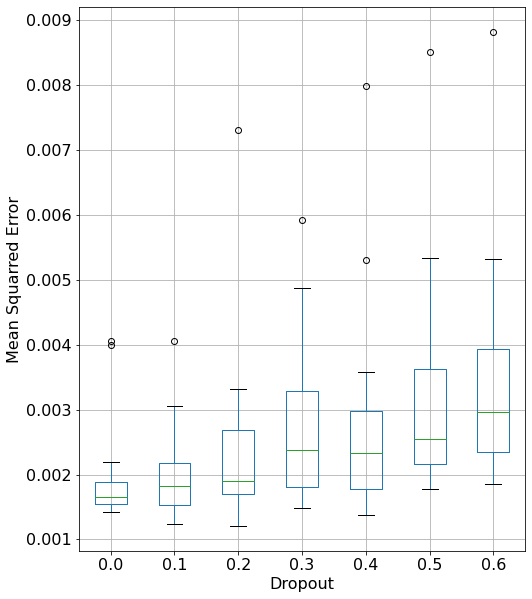

In [64]:
run_dropout()

In [68]:
#LSTM hyperparameter tuning 2nd step : lerning rate
# fit a model and plot learning curve
def trial_lrate(lrate):
    # define model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(75, return_sequences = True, input_shape = (X_train_adj.shape[1], X_train_adj.shape[2])))
    model.add(tf.keras.layers.LSTM(units=30))
    model.add(tf.keras.layers.Dropout(0))
    model.add(tf.keras.layers.Dense(units=1))
    
    # compile model
    opt = tf.keras.optimizers.Adam(lr=lrate)
    model.compile(loss = 'mse', optimizer = opt, metrics=[tf.keras.metrics.MeanSquaredError()])
    
    model.summary() 
    
    # fit model
    model_history = model.fit(X_train_adj, y_train, epochs =10, 
                                  batch_size=8, validation_data = (X_val_adj, y_val), 
                                  verbose=2)
    return(model)

In [69]:
# run a repeated experiment
def experiment_lrate(n_repeats, lrate):
    # run experiment
    error_scores = list()
    for r in range(n_repeats):
        # fit the model
        # forecast test dataset
        output = trial_lrate(lrate).predict(X_val_adj)
        # report performance
        mse = metrics.mean_squared_error(y_val, output)
        print('%d) Test RMSE: %.3f' % (r+1, mse))
        error_scores.append(mse)
    return error_scores

In [70]:
def run_lrate():
    # load dataset
    learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5]
    n_repeats = 20
    # run the experiment
    results = pd.DataFrame()
    for lrate in learning_rates:
        results[str(lrate)] = experiment_lrate(n_repeats, lrate)
    # summarize results
    print(results.describe())
    # save boxplot
    results.to_excel('lstm_lrate.xlsx')
    results.boxplot()
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('Learning rate', fontsize=16)
    plt.ylabel('Mean Squarred Error', fontsize=16)
    plt.savefig('experiment_dropout_input.png')

Model: "sequential_266"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_532 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_533 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_266 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_266 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1436/1436 - 8s - loss: 0.5372 - mean_squared_error: 0.5372 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 2/10
1436/1436 - 6s - loss: 0.2715 - mean_squared_error: 0.2715 - val_loss: 0.1331 - val_mean_squared_error: 0.1331
Ep

Epoch 9/10
1436/1436 - 6s - loss: 0.3071 - mean_squared_error: 0.3071 - val_loss: 0.0517 - val_mean_squared_error: 0.0517
Epoch 10/10
1436/1436 - 6s - loss: 0.3047 - mean_squared_error: 0.3047 - val_loss: 1.0682 - val_mean_squared_error: 1.0682
4) Test RMSE: 1.068
Model: "sequential_270"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_540 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_541 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_270 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_270 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_______________________________________________

Epoch 7/10
1436/1436 - 6s - loss: 0.2909 - mean_squared_error: 0.2909 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 8/10
1436/1436 - 6s - loss: 0.3068 - mean_squared_error: 0.3068 - val_loss: 0.4064 - val_mean_squared_error: 0.4064
Epoch 9/10
1436/1436 - 6s - loss: 0.2998 - mean_squared_error: 0.2998 - val_loss: 0.7560 - val_mean_squared_error: 0.7560
Epoch 10/10
1436/1436 - 6s - loss: 0.2767 - mean_squared_error: 0.2767 - val_loss: 0.3177 - val_mean_squared_error: 0.3177
8) Test RMSE: 0.318
Model: "sequential_274"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_548 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_549 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_274 (Dropout)        (None, 30)                0         
_____

Epoch 5/10
1436/1436 - 6s - loss: 0.2706 - mean_squared_error: 0.2706 - val_loss: 0.0520 - val_mean_squared_error: 0.0520
Epoch 6/10
1436/1436 - 6s - loss: 0.2606 - mean_squared_error: 0.2606 - val_loss: 0.3824 - val_mean_squared_error: 0.3824
Epoch 7/10
1436/1436 - 7s - loss: 0.2720 - mean_squared_error: 0.2720 - val_loss: 0.8479 - val_mean_squared_error: 0.8479
Epoch 8/10
1436/1436 - 7s - loss: 0.2616 - mean_squared_error: 0.2616 - val_loss: 0.1758 - val_mean_squared_error: 0.1758
Epoch 9/10
1436/1436 - 6s - loss: 0.2554 - mean_squared_error: 0.2554 - val_loss: 0.0981 - val_mean_squared_error: 0.0981
Epoch 10/10
1436/1436 - 6s - loss: 0.2681 - mean_squared_error: 0.2681 - val_loss: 0.0712 - val_mean_squared_error: 0.0712
12) Test RMSE: 0.071
Model: "sequential_278"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_556 (LSTM)              (None, 1, 75)             27600     
________________________

Epoch 3/10
1436/1436 - 6s - loss: 0.2659 - mean_squared_error: 0.2659 - val_loss: 0.2346 - val_mean_squared_error: 0.2346
Epoch 4/10
1436/1436 - 6s - loss: 0.2556 - mean_squared_error: 0.2556 - val_loss: 0.2505 - val_mean_squared_error: 0.2505
Epoch 5/10
1436/1436 - 7s - loss: 0.2771 - mean_squared_error: 0.2771 - val_loss: 0.3087 - val_mean_squared_error: 0.3087
Epoch 6/10
1436/1436 - 6s - loss: 0.2468 - mean_squared_error: 0.2468 - val_loss: 1.8979 - val_mean_squared_error: 1.8979
Epoch 7/10
1436/1436 - 6s - loss: 0.2802 - mean_squared_error: 0.2802 - val_loss: 0.7964 - val_mean_squared_error: 0.7964
Epoch 8/10
1436/1436 - 6s - loss: 0.2447 - mean_squared_error: 0.2447 - val_loss: 0.1510 - val_mean_squared_error: 0.1510
Epoch 9/10
1436/1436 - 6s - loss: 0.2666 - mean_squared_error: 0.2666 - val_loss: 1.3418 - val_mean_squared_error: 1.3418
Epoch 10/10
1436/1436 - 6s - loss: 0.2565 - mean_squared_error: 0.2565 - val_loss: 0.1065 - val_mean_squared_error: 0.1065
16) Test RMSE: 0.107
Mo

1436/1436 - 7s - loss: 0.5950 - mean_squared_error: 0.5950 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 2/10
1436/1436 - 7s - loss: 0.2577 - mean_squared_error: 0.2577 - val_loss: 0.0495 - val_mean_squared_error: 0.0495
Epoch 3/10
1436/1436 - 7s - loss: 0.3106 - mean_squared_error: 0.3106 - val_loss: 0.1228 - val_mean_squared_error: 0.1228
Epoch 4/10
1436/1436 - 7s - loss: 0.2980 - mean_squared_error: 0.2980 - val_loss: 0.8418 - val_mean_squared_error: 0.8418
Epoch 5/10
1436/1436 - 7s - loss: 0.3097 - mean_squared_error: 0.3097 - val_loss: 0.6808 - val_mean_squared_error: 0.6808
Epoch 6/10
1436/1436 - 7s - loss: 0.2858 - mean_squared_error: 0.2858 - val_loss: 0.7829 - val_mean_squared_error: 0.7829
Epoch 7/10
1436/1436 - 6s - loss: 0.2912 - mean_squared_error: 0.2912 - val_loss: 0.2315 - val_mean_squared_error: 0.2315
Epoch 8/10
1436/1436 - 6s - loss: 0.2883 - mean_squared_error: 0.2883 - val_loss: 0.0849 - val_mean_squared_error: 0.0849
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0838 - mean_squared_error: 0.0838 - val_loss: 0.1091 - val_mean_squared_error: 0.1091
Epoch 2/10
1436/1436 - 7s - loss: 0.0817 - mean_squared_error: 0.0817 - val_loss: 0.2524 - val_mean_squared_error: 0.2524
Epoch 3/10
1436/1436 - 7s - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.1521 - val_mean_squared_error: 0.1521
Epoch 4/10
1436/1436 - 7s - loss: 0.0838 - mean_squared_error: 0.0838 - val_loss: 0.2012 - val_mean_squared_error: 0.2012
Epoch 5/10
1436/1436 - 7s - loss: 0.0823 - mean_squared_error: 0.0823 - val_loss: 0.0724 - val_mean_squared_error: 0.0724
Epoch 6/10
1436/1436 - 7s - loss: 0.0835 - mean_squared_error: 0.0835 - val_loss: 0.2535 - val_mean_squared_error: 0.2535
Epoch 7/10
1436/1436 - 7s - loss: 0.0823 - mean_squared_error: 0.0823 - val_loss: 0.1105 - val_mean_squared_error: 0.1105
Epoch 8/10
1436/1436 - 7s - loss: 0.0822 - mean_squared_error: 0.0822 - val_loss: 0.1413 - val_mean_squared_error: 0.1413
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 7s - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 2/10
1436/1436 - 6s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 3/10
1436/1436 - 6s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 4/10
1436/1436 - 6s - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 5/10
1436/1436 - 6s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 6/10
1436/1436 - 6s - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 7/10
1436/1436 - 6s - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 8/10
1436/1436 - 6s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 2/10
1436/1436 - 7s - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 3/10
1436/1436 - 7s - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 4/10
1436/1436 - 7s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 5/10
1436/1436 - 7s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 6/10
1436/1436 - 7s - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 7/10
1436/1436 - 6s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 8/10
1436/1436 - 6s - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 7s - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 2/10
1436/1436 - 7s - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 3/10
1436/1436 - 6s - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 4/10
1436/1436 - 6s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 5/10
1436/1436 - 6s - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 6/10
1436/1436 - 7s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 7/10
1436/1436 - 7s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 8/10
1436/1436 - 7s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 2/10
1436/1436 - 7s - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 3/10
1436/1436 - 7s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 4/10
1436/1436 - 7s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 5/10
1436/1436 - 7s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 6/10
1436/1436 - 7s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 7/10
1436/1436 - 7s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 8/10
1436/1436 - 7s - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 7s - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 2/10
1436/1436 - 7s - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 3/10
1436/1436 - 6s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 4/10
1436/1436 - 6s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 5/10
1436/1436 - 6s - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 6/10
1436/1436 - 7s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 7/10
1436/1436 - 6s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 8/10
1436/1436 - 6s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 2/10
1436/1436 - 7s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 3/10
1436/1436 - 7s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 4/10
1436/1436 - 7s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 5/10
1436/1436 - 7s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 6/10
1436/1436 - 8s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 7/10
1436/1436 - 7s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 8/10
1436/1436 - 7s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 8s - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 2/10
1436/1436 - 7s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 3/10
1436/1436 - 7s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 4/10
1436/1436 - 7s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 5/10
1436/1436 - 7s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 6/10
1436/1436 - 7s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 7/10
1436/1436 - 7s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 8/10
1436/1436 - 7s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 7s - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2/10
1436/1436 - 6s - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 3/10
1436/1436 - 6s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 4/10
1436/1436 - 6s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 5/10
1436/1436 - 6s - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 6/10
1436/1436 - 6s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 7/10
1436/1436 - 6s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 8/10
1436/1436 - 6s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 2/10
1436/1436 - 6s - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 3/10
1436/1436 - 6s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 4/10
1436/1436 - 6s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 5/10
1436/1436 - 6s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 6/10
1436/1436 - 6s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 7/10
1436/1436 - 6s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 8/10
1436/1436 - 6s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 2/10
1436/1436 - 7s - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 3/10
1436/1436 - 7s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 4/10
1436/1436 - 7s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 5/10
1436/1436 - 7s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 6/10
1436/1436 - 7s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 7/10
1436/1436 - 7s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 8/10
1436/1436 - 7s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 7s - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 2/10
1436/1436 - 6s - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 3/10
1436/1436 - 7s - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 4/10
1436/1436 - 7s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 5/10
1436/1436 - 7s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 6/10
1436/1436 - 7s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 7/10
1436/1436 - 6s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 8/10
1436/1436 - 6s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 2/10
1436/1436 - 6s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 3/10
1436/1436 - 6s - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 4/10
1436/1436 - 6s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 5/10
1436/1436 - 6s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 6/10
1436/1436 - 6s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 7/10
1436/1436 - 7s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 8/10
1436/1436 - 6s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 2/10
1436/1436 - 7s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 3/10
1436/1436 - 7s - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 4/10
1436/1436 - 7s - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 5/10
1436/1436 - 7s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 6/10
1436/1436 - 7s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 7/10
1436/1436 - 7s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 8/10
1436/1436 - 7s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 7s - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 2/10
1436/1436 - 7s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 3/10
1436/1436 - 7s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 4/10
1436/1436 - 7s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 5/10
1436/1436 - 7s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 6/10
1436/1436 - 7s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 7/10
1436/1436 - 7s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 8/10
1436/1436 - 7s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 7s - loss: 0.0429 - mean_squared_error: 0.0429 - val_loss: 0.0180 - val_mean_squared_error: 0.0180
Epoch 2/10
1436/1436 - 6s - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 3/10
1436/1436 - 6s - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 4/10
1436/1436 - 6s - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 5/10
1436/1436 - 7s - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 6/10
1436/1436 - 7s - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 7/10
1436/1436 - 6s - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 8/10
1436/1436 - 6s - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0448 - mean_squared_error: 0.0448 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 2/10
1436/1436 - 7s - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 3/10
1436/1436 - 7s - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 4/10
1436/1436 - 7s - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 5/10
1436/1436 - 7s - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 6/10
1436/1436 - 7s - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 7/10
1436/1436 - 7s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 8/10
1436/1436 - 7s - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 7s - loss: 0.0488 - mean_squared_error: 0.0488 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 2/10
1436/1436 - 7s - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 3/10
1436/1436 - 7s - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 4/10
1436/1436 - 7s - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 5/10
1436/1436 - 6s - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 6/10
1436/1436 - 7s - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 7/10
1436/1436 - 7s - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 8/10
1436/1436 - 7s - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 7s - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 2/10
1436/1436 - 7s - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 3/10
1436/1436 - 6s - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 4/10
1436/1436 - 6s - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 5/10
1436/1436 - 6s - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 6/10
1436/1436 - 7s - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 7/10
1436/1436 - 7s - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 8/10
1436/1436 - 6s - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 8s - loss: 0.0470 - mean_squared_error: 0.0470 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 2/10
1436/1436 - 7s - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 3/10
1436/1436 - 7s - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 4/10
1436/1436 - 7s - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 5/10
1436/1436 - 7s - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 6/10
1436/1436 - 7s - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 7/10
1436/1436 - 7s - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 8/10
1436/1436 - 7s - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 7s - loss: 0.1637 - mean_squared_error: 0.1637 - val_loss: 0.2517 - val_mean_squared_error: 0.2517
Epoch 2/10
1436/1436 - 7s - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.0802 - val_mean_squared_error: 0.0802
Epoch 3/10
1436/1436 - 6s - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0561 - val_mean_squared_error: 0.0561
Epoch 4/10
1436/1436 - 7s - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.0491 - val_mean_squared_error: 0.0491
Epoch 5/10
1436/1436 - 7s - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 6/10
1436/1436 - 7s - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0386 - val_mean_squared_error: 0.0386
Epoch 7/10
1436/1436 - 6s - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0341 - val_mean_squared_error: 0.0341
Epoch 8/10
1436/1436 - 7s - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0301 - val_mean_squared_error: 0.0301
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 7s - loss: 0.1808 - mean_squared_error: 0.1808 - val_loss: 0.2660 - val_mean_squared_error: 0.2660
Epoch 2/10
1436/1436 - 6s - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.0743 - val_mean_squared_error: 0.0743
Epoch 3/10
1436/1436 - 7s - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0548 - val_mean_squared_error: 0.0548
Epoch 4/10
1436/1436 - 7s - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 5/10
1436/1436 - 7s - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.0413 - val_mean_squared_error: 0.0413
Epoch 6/10
1436/1436 - 7s - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.0364 - val_mean_squared_error: 0.0364
Epoch 7/10
1436/1436 - 7s - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0318 - val_mean_squared_error: 0.0318
Epoch 8/10
1436/1436 - 7s - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 7s - loss: 0.1953 - mean_squared_error: 0.1953 - val_loss: 0.3176 - val_mean_squared_error: 0.3176
Epoch 2/10
1436/1436 - 7s - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.0966 - val_mean_squared_error: 0.0966
Epoch 3/10
1436/1436 - 7s - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.0583 - val_mean_squared_error: 0.0583
Epoch 4/10
1436/1436 - 7s - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 5/10
1436/1436 - 7s - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 6/10
1436/1436 - 7s - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 7/10
1436/1436 - 7s - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 8/10
1436/1436 - 7s - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 7s - loss: 0.1847 - mean_squared_error: 0.1847 - val_loss: 0.3025 - val_mean_squared_error: 0.3025
Epoch 2/10
1436/1436 - 7s - loss: 0.0734 - mean_squared_error: 0.0734 - val_loss: 0.0923 - val_mean_squared_error: 0.0923
Epoch 3/10
1436/1436 - 7s - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.0599 - val_mean_squared_error: 0.0599
Epoch 4/10
1436/1436 - 7s - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.0513 - val_mean_squared_error: 0.0513
Epoch 5/10
1436/1436 - 7s - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 6/10
1436/1436 - 7s - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0397 - val_mean_squared_error: 0.0397
Epoch 7/10
1436/1436 - 7s - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 8/10
1436/1436 - 7s - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0315 - val_mean_squared_error: 0.0315
Epoch 9/10
1436/1436 - 7s - loss: 0

1436/1436 - 7s - loss: 0.1764 - mean_squared_error: 0.1764 - val_loss: 0.2651 - val_mean_squared_error: 0.2651
Epoch 2/10
1436/1436 - 7s - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.0837 - val_mean_squared_error: 0.0837
Epoch 3/10
1436/1436 - 7s - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.0614 - val_mean_squared_error: 0.0614
Epoch 4/10
1436/1436 - 7s - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.0523 - val_mean_squared_error: 0.0523
Epoch 5/10
1436/1436 - 7s - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 6/10
1436/1436 - 7s - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 7/10
1436/1436 - 7s - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0350 - val_mean_squared_error: 0.0350
Epoch 8/10
1436/1436 - 7s - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0303 - val_mean_squared_error: 0.0303
Epoch 9/10
1436/1436 - 7s - loss: 0

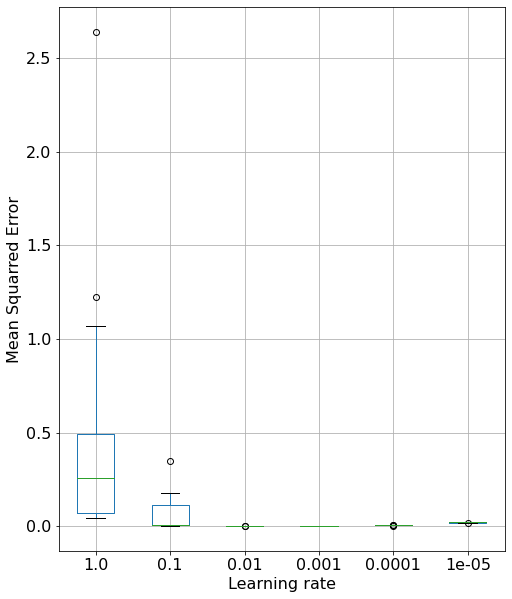

In [71]:
 # entry point
run_lrate()

In [46]:
#Define final LSTM model
def final_model():
    # define model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(75, return_sequences = True, input_shape = (X_train_adj.shape[1], X_train_adj.shape[2])))
    model.add(tf.keras.layers.LSTM(units=30))
    model.add(tf.keras.layers.Dropout(0))
    model.add(tf.keras.layers.Dense(units=1))
    
    # compile model
    opt = tf.keras.optimizers.Adam(lr=0.01)
    model.compile(loss = 'mse', optimizer = opt, metrics=[tf.keras.metrics.MeanSquaredError()])
    
    model.summary() 
    
    # fit model
    history = model.fit(X_train_adj, y_train, epochs =10, 
                                  batch_size=8, validation_data = (X_val_adj, y_val), 
                                  verbose=0)
    
    return(model)

In [50]:
# run a repeated experiment
def run_train(n_repeats):
    #Summarize result
    # run experiment
    error_scores = list()
    for r in range(n_repeats):
        # fit the model
        # forecast test dataset
        output = final_model().predict(X_val_adj)
        # report performance
        score = model_metrics(y_val, output)
        print(score)
        error_scores.append(score)
    return error_scores

In [51]:
run_train(100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 75)             27600     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                12720     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.5321281187575644
Mean Squared Error: 0.46227909197811173
Root Mean Squared Error: 0.6799110912303988
Coefficient of Determination: 0.9573196308434088
Akaike Information Criterion: -1871.275
Bayesian Information Criterion: -1859

Mean Absolute Error: 0.6750631288820941
Mean Squared Error: 0.7018115853772188
Root Mean Squared Error: 0.8377419563190199
Coefficient of Determination: 0.9558069662600568
Akaike Information Criterion: -1758.227
Bayesian Information Criterion: -1746.749
None
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 1, 75)             27600     
_________________________________________________________________
lstm_17 (LSTM)               (None, 30)                12720     
_________________________________________________________________
dropout_8 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_______________________________________________________

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 1, 75)             27600     
_________________________________________________________________
lstm_31 (LSTM)               (None, 30)                12720     
_________________________________________________________________
dropout_15 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.7141724885507977
Mean Squared Error: 0.7566182522291249
Root Mean Squared Error: 0.8698380609223334
Coefficient of Determination: 0.9663404118588276
Akaike Information Criterion: -1882.230
Bayesian Information Criterion: -18

Mean Absolute Error: 0.5239463179712956
Mean Squared Error: 0.4589960630743457
Root Mean Squared Error: 0.6774924819319736
Coefficient of Determination: 0.9672094483338707
Akaike Information Criterion: -1887.761
Bayesian Information Criterion: -1876.283
None
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 1, 75)             27600     
_________________________________________________________________
lstm_47 (LSTM)               (None, 30)                12720     
_________________________________________________________________
dropout_23 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
______________________________________________________

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_60 (LSTM)               (None, 1, 75)             27600     
_________________________________________________________________
lstm_61 (LSTM)               (None, 30)                12720     
_________________________________________________________________
dropout_30 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.6542806938970774
Mean Squared Error: 0.7210860868640829
Root Mean Squared Error: 0.8491678790816825
Coefficient of Determination: 0.9460588973801728
Akaike Information Criterion: -1359.107
Bayesian Information Criterion: -13

Mean Absolute Error: 0.6295439659825578
Mean Squared Error: 0.5981842588715189
Root Mean Squared Error: 0.7734237253094315
Coefficient of Determination: 0.9613233432918231
Akaike Information Criterion: -2019.478
Bayesian Information Criterion: -2008.000
None
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_76 (LSTM)               (None, 1, 75)             27600     
_________________________________________________________________
lstm_77 (LSTM)               (None, 30)                12720     
_________________________________________________________________
dropout_38 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
______________________________________________________

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_90 (LSTM)               (None, 1, 75)             27600     
_________________________________________________________________
lstm_91 (LSTM)               (None, 30)                12720     
_________________________________________________________________
dropout_45 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.5449829723588525
Mean Squared Error: 0.4851218004377986
Root Mean Squared Error: 0.6965068559876483
Coefficient of Determination: 0.9648048076987301
Akaike Information Criterion: -1667.060
Bayesian Information Criterion: -16

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [47]:
X_test_adj = X_test.reshape((X_test.shape[0], 1, X_test.shape[1])) 

In [48]:
# run a repeated experiment
def run_test(n_repeats):
    #Summarize result
    # run experiment
    error_scores = list()
    for r in range(n_repeats):
        # fit the model
        # forecast test dataset
        predict = final_model().predict(X_test_adj)
        # report performance
        score = model_metrics(y_test, predict)
        print(score)
        error_scores.append(score)
    return error_scores

In [49]:
run_test(100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 75)             27600     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                12720     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 1.3459890904730825
Mean Squared Error: 2.400546908926782
Root Mean Squared Error: 1.5493698425252707
Coefficient of Determination: 0.7704005507839072
Akaike Information Criterion: -437.071
Bayesian Information Criterion: -425.478

Mean Absolute Error: 0.9318648565422082
Mean Squared Error: 1.2947166351030026
Root Mean Squared Error: 1.137856157474662
Coefficient of Determination: 0.7293867513994448
Akaike Information Criterion: -516.573
Bayesian Information Criterion: -504.980
None
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 1, 75)             27600     
_________________________________________________________________
lstm_17 (LSTM)               (None, 30)                12720     
_________________________________________________________________
dropout_8 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
__________________________________________________________

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 1, 75)             27600     
_________________________________________________________________
lstm_31 (LSTM)               (None, 30)                12720     
_________________________________________________________________
dropout_15 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 1.6369741853488542
Mean Squared Error: 3.404117337793437
Root Mean Squared Error: 1.8450250236225625
Coefficient of Determination: 0.7705635344313054
Akaike Information Criterion: -396.783
Bayesian Information Criterion: -385.

Mean Absolute Error: 0.6222696081250174
Mean Squared Error: 0.5929969560966182
Root Mean Squared Error: 0.7700629559306292
Coefficient of Determination: 0.8742840856599969
Akaike Information Criterion: -1567.237
Bayesian Information Criterion: -1555.644
None
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 1, 75)             27600     
_________________________________________________________________
lstm_47 (LSTM)               (None, 30)                12720     
_________________________________________________________________
dropout_23 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
______________________________________________________

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_60 (LSTM)               (None, 1, 75)             27600     
_________________________________________________________________
lstm_61 (LSTM)               (None, 30)                12720     
_________________________________________________________________
dropout_30 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.7793697671933107
Mean Squared Error: 0.9243667386413542
Root Mean Squared Error: 0.9614399298143146
Coefficient of Determination: 0.820812089586565
Akaike Information Criterion: -1211.981
Bayesian Information Criterion: -120

Mean Absolute Error: 0.778465063016766
Mean Squared Error: 0.9912809342582615
Root Mean Squared Error: 0.9956309227109519
Coefficient of Determination: 0.46390651967675733
Akaike Information Criterion: -750.710
Bayesian Information Criterion: -739.117
None
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_76 (LSTM)               (None, 1, 75)             27600     
_________________________________________________________________
lstm_77 (LSTM)               (None, 30)                12720     
_________________________________________________________________
dropout_38 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
________________________________________________________

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_90 (LSTM)               (None, 1, 75)             27600     
_________________________________________________________________
lstm_91 (LSTM)               (None, 30)                12720     
_________________________________________________________________
dropout_45 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.9455881623058138
Mean Squared Error: 1.4303520619056531
Root Mean Squared Error: 1.1959732697287397
Coefficient of Determination: 0.7777278138451358
Akaike Information Criterion: -489.527
Bayesian Information Criterion: -477

Mean Absolute Error: 0.6482407485506833
Mean Squared Error: 0.6503754933114981
Root Mean Squared Error: 0.8064586122743672
Coefficient of Determination: 0.8611404809632255
Akaike Information Criterion: -1348.864
Bayesian Information Criterion: -1337.271
None
Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_106 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_107 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_53 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
______________________________________________________

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_120 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_121 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_60 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.7028887170677381
Mean Squared Error: 0.7638075705295028
Root Mean Squared Error: 0.8739608518289036
Coefficient of Determination: 0.5615887636485519
Akaike Information Criterion: -1047.222
Bayesian Information Criterion: -10

Mean Absolute Error: 0.7938103634782853
Mean Squared Error: 0.9771208131913859
Root Mean Squared Error: 0.9884942150520588
Coefficient of Determination: 0.744672990329492
Akaike Information Criterion: -960.081
Bayesian Information Criterion: -948.488
None
Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_136 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_137 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_68 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_150 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_151 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_75 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.674380574611606
Mean Squared Error: 0.7010521596824016
Root Mean Squared Error: 0.8372885761088597
Coefficient of Determination: 0.7605355623668176
Akaike Information Criterion: -1012.674
Bayesian Information Criterion: -100

Mean Absolute Error: 0.6993154513803345
Mean Squared Error: 0.7803631102258287
Root Mean Squared Error: 0.8833816333985152
Coefficient of Determination: 0.8095023748035635
Akaike Information Criterion: -996.687
Bayesian Information Criterion: -985.094
None
Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_166 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_167 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_83 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
________________________________________________________

Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_180 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_181 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_90 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_90 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.6503924423470197
Mean Squared Error: 0.6584227931597683
Root Mean Squared Error: 0.8114325561374576
Coefficient of Determination: 0.8520098462990666
Akaike Information Criterion: -1203.969
Bayesian Information Criterion: -11

Mean Absolute Error: 0.7079433212235552
Mean Squared Error: 0.7753815400084061
Root Mean Squared Error: 0.8805575165816292
Coefficient of Determination: 0.7976065438884894
Akaike Information Criterion: -1113.389
Bayesian Information Criterion: -1101.796
None
Model: "sequential_98"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_196 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_197 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_98 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_98 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
______________________________________________________

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
#predict taeget for validation
final_pred = final_model().predict(X_val_adj)
model_metrics(y_val, final_pred)

In [ ]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,3))
    plt.plot(return_conversion_scale(y_val), label = "Actual Conversion")
    plt.plot(return_conversion_scale(final_pred), label = "Prediction") 
    plt.title('LSTM Training')
    plt.xlabel('Time (h)')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

In [ ]:
#Plot relationship between observed and predicted value
m_lstm_train, b_lstm_train = np.polyfit(return_conversion_scale(y_val), return_conversion_scale(final_pred), 1)

with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,6))
    plt.plot(return_conversion_scale(y_val), return_conversion_scale(final_pred), 'o', 
             markeredgecolor='k', markersize=3, markerfacecolor='w')
    plt.plot(return_conversion_scale(y_val), m_lstm_train*(return_conversion_scale(y_val)) + b_lstm_train, color = 'r')
    plt.xlabel('Observation')
    plt.ylabel('Prediction')
    plt.show()

In [ ]:
#Now predict with test data
#reshape testing data into 3 dimension
X_test_adj = X_test.reshape((X_test.shape[0], 1, X_test.shape[1])) 

#Predict test data
test_pred = final_model().predict(X_test_adj)

#Measure performance metrics
model_metrics(y_test, test_pred)

In [ ]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,3))
    plt.plot(return_conversion_scale(y_test), label = "Actual Conversion")
    plt.plot(return_conversion_scale(test_pred), label = "Prediction")
    plt.title('LSTM Testing')
    plt.xlabel('Time (h)')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

In [ ]:
#Plot relationship between observed and predicted value
m_lstm_test, b_lstm_test = np.polyfit(return_conversion_scale(y_test), return_conversion_scale(test_pred), 1)

with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,6))
    plt.plot(return_conversion_scale(y_test), return_conversion_scale(test_pred), 'o', 
             markeredgecolor='k', markersize=3, markerfacecolor='w')
    plt.plot(return_conversion_scale(y_test), m_lstm_test*(return_conversion_scale(y_test)) + b_lstm_test, color = 'r')
    plt.xlabel('Observation')
    plt.ylabel('Prediction')
    plt.show()